In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
mpl.rc('font', family = 'Malgun Gothic')
    
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv')
print(df.shape)
df.head()

(91335, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [4]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# 결측치 확인하기

In [5]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

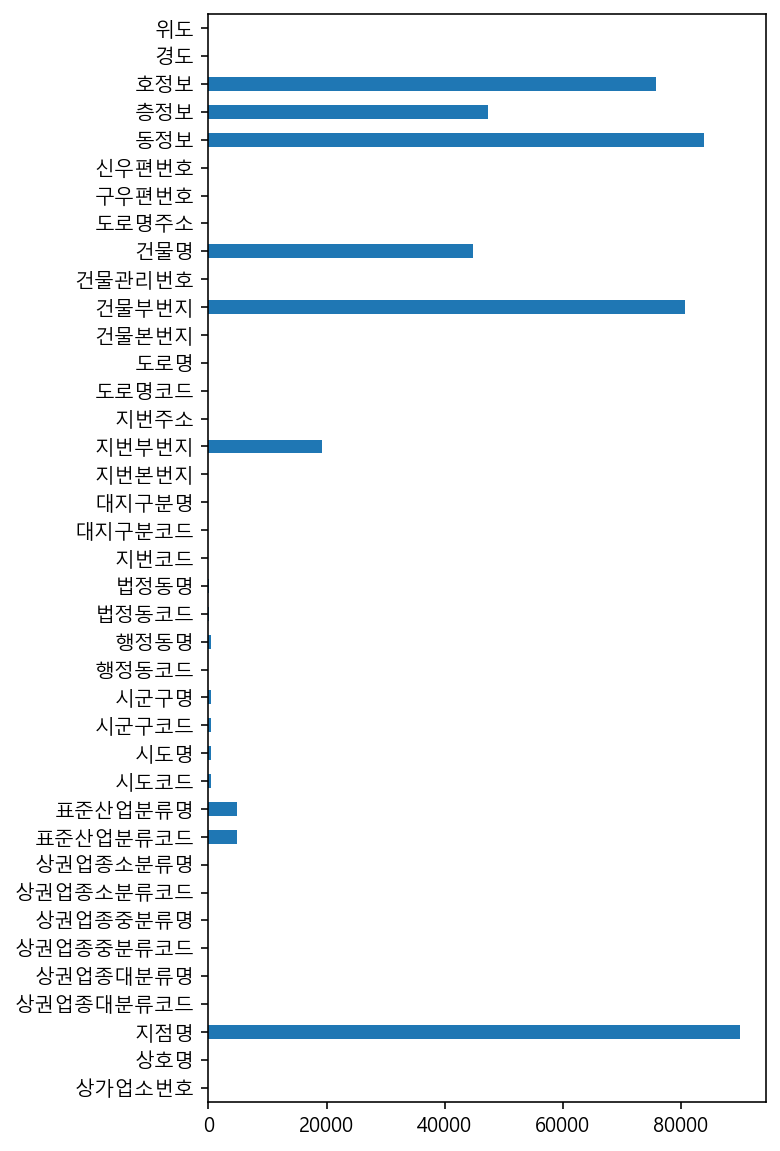

In [6]:
null_count = df.isnull().sum()
null_count.plot.barh(figsize = (5,10))

In [7]:
null_count = null_count.reset_index()
null_count.columns = ['컬럼명','결측치 수']

In [8]:
drop_data = null_count.sort_values(by = '결측치 수', ascending = False).head(10)
drop_data

,컬럼명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [9]:
drop_columns = drop_data['컬럼명'].tolist()
df = df.drop(columns = drop_columns, axis = 1) # 열을 기준으로 제거
df

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,경기도,41390.0,...,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,4139013200117400001017064,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,부산광역시,26500.0,...,부산광역시 수영구 광안동 74-1,265003131037,부산광역시 수영구 수영로,688,2650010400100740001009932,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,대전광역시,30170.0,...,대전광역시 서구 둔산동 1507,301703166026,대전광역시 서구 문예로,67,3017011200115070000021096,대전광역시 서구 문예로 67,302831.0,35240.0,127.389865,36.352728
91331,16192180,리원,S,의료,S07,의료관련서비스업,S07A07,산후조리원,경기도,41281.0,...,경기도 고양시 덕양구 화정동 1146,412813192038,경기도 고양시 덕양구 성신로,14,4128112300111460000011715,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,126.830144,37.627530
91332,16127538,참좋은요양병원,S,의료,S01,병원,S01B17,노인/치매병원,부산광역시,26410.0,...,부산광역시 금정구 장전동 538-1,264103130022,부산광역시 금정구 금강로,209,2641010800105380001005572,부산광역시 금정구 금강로 209,609841.0,46294.0,129.082790,35.227138
91333,16108681,경희중앙한의원,S,의료,S01,병원,S01B06,한의원,서울특별시,11740.0,...,서울특별시 강동구 길동 345-9,117403124009,서울특별시 강동구 천중로,213,1174010500103450009002392,서울특별시 강동구 천중로 213,134811.0,5303.0,127.143958,37.540993


In [10]:
df['상권업종소분류명'].nunique()

34

<AxesSubplot:>

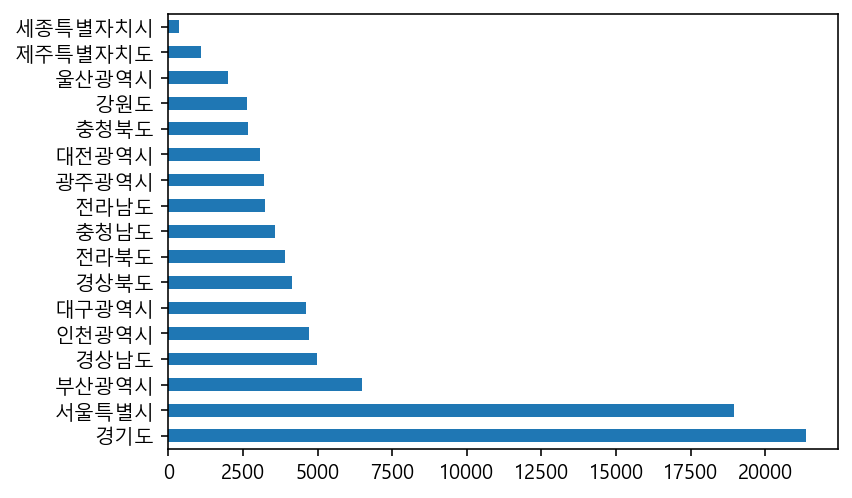

In [11]:
city = df['시도명'].value_counts()
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

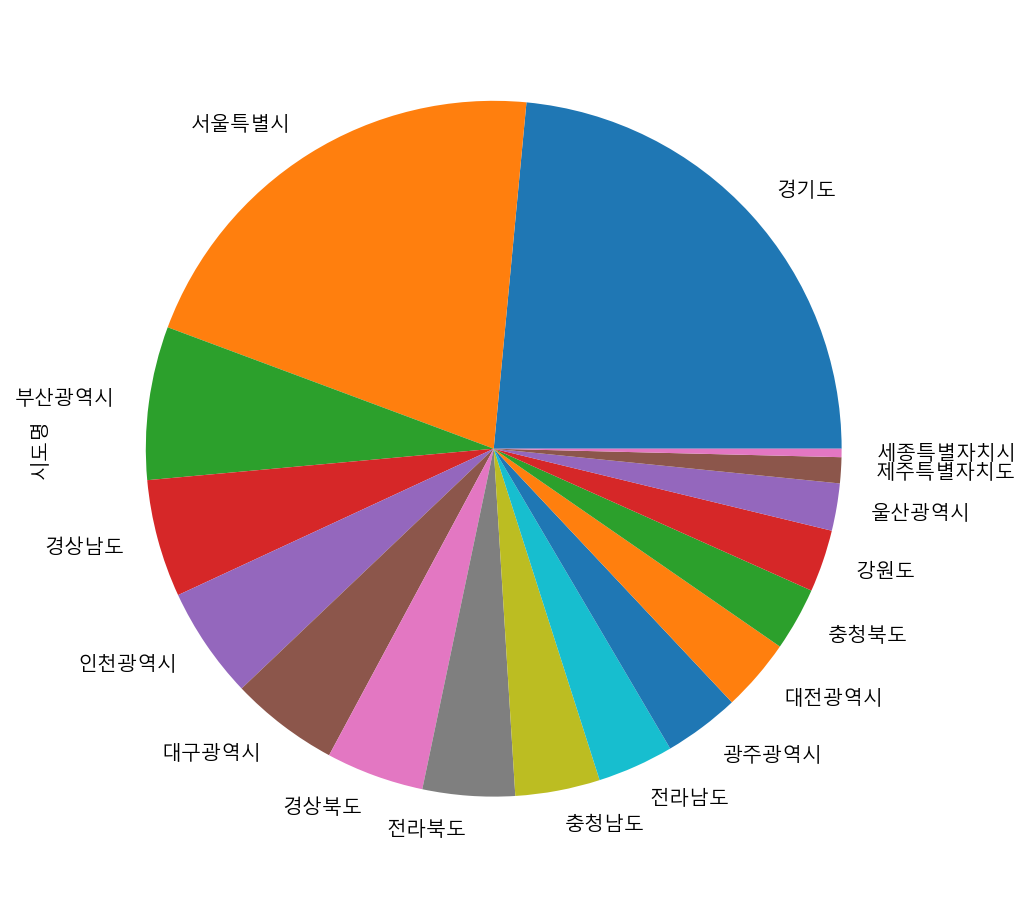

In [12]:
city.plot.pie(figsize = (8,8))

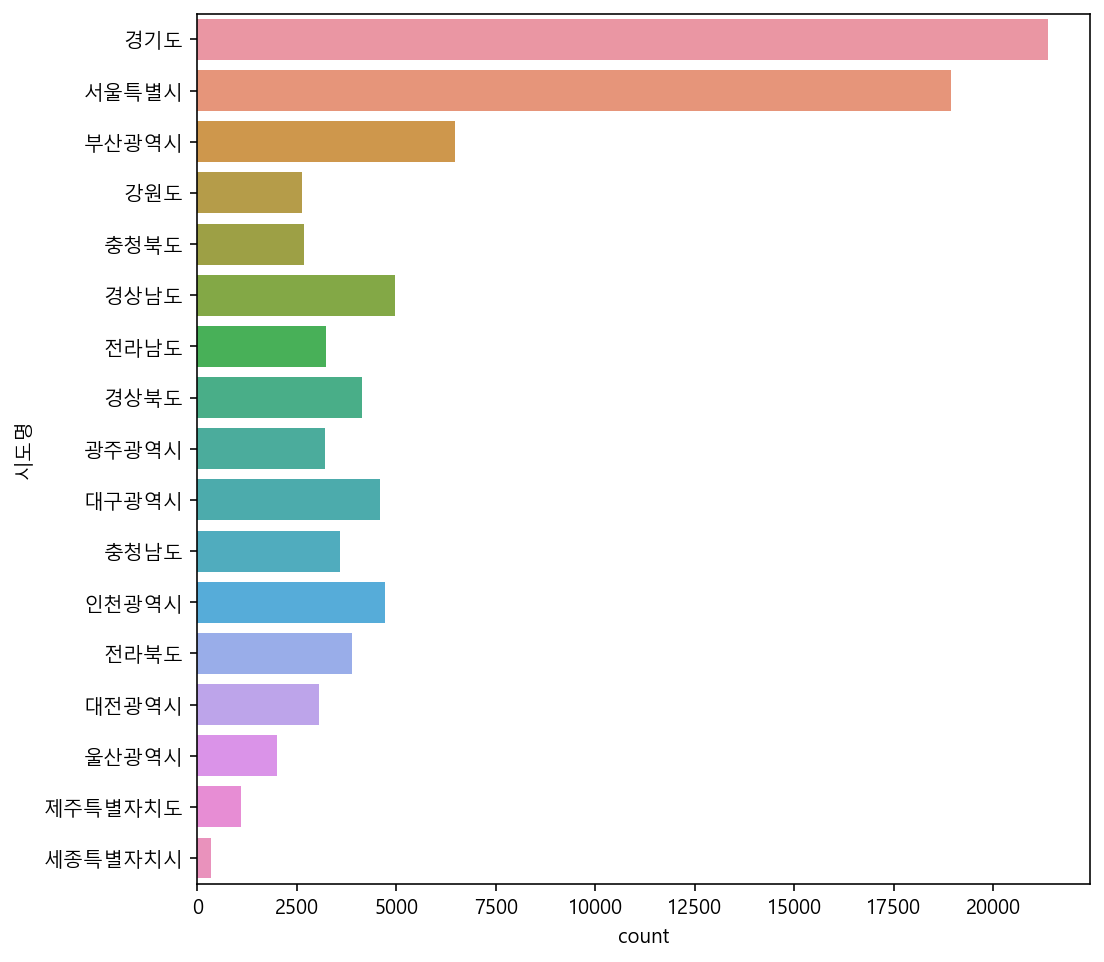

In [13]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, y = '시도명')
plt.show()

In [14]:
# 데이터 색인하기(상권업종중분류명 -> 약국/한약방 데이터 갖고오기)
df[(df['상권업종중분류명'] == '약국/한약방') & (df['시도명'] == '서울특별시')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,...,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,...,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


In [15]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

#### 서울시약국 데이터를 갖고와서 barplot으로 그려보기

In [16]:
df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
df_seoul_drug

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,...,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,...,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


In [17]:
df_seoul_drug['시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
마포구     136
강서구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

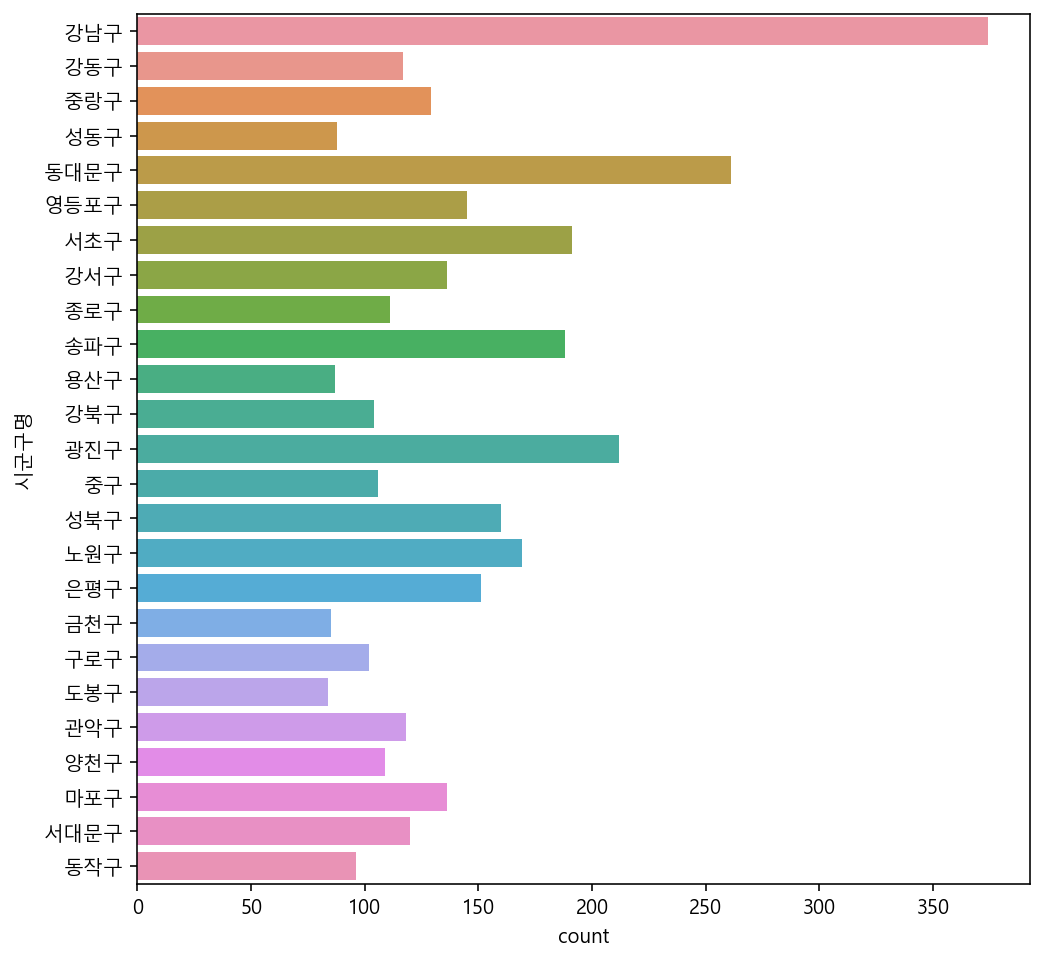

In [18]:
plt.figure(figsize = (8,8))
sns.countplot(data = df_seoul_drug, y = '시군구명')
plt.show()

### ex) 상권업종소분류명 -> 종합병원 데이터 & 서울시 데이터 색인 -> 구별로 몇개? 시각화?

In [19]:
df_seoul_hospital = df[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시')]
df_seoul_hospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [20]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
강동구      5
송파구      5
중구       5
양천구      4
서대문구     4
강북구      4
도봉구      4
성북구      3
노원구      2
구로구      2
관악구      2
동대문구     2
강서구      2
중랑구      2
성동구      2
종로구      2
금천구      2
은평구      1
용산구      1
동작구      1
마포구      1
Name: 시군구명, dtype: int64

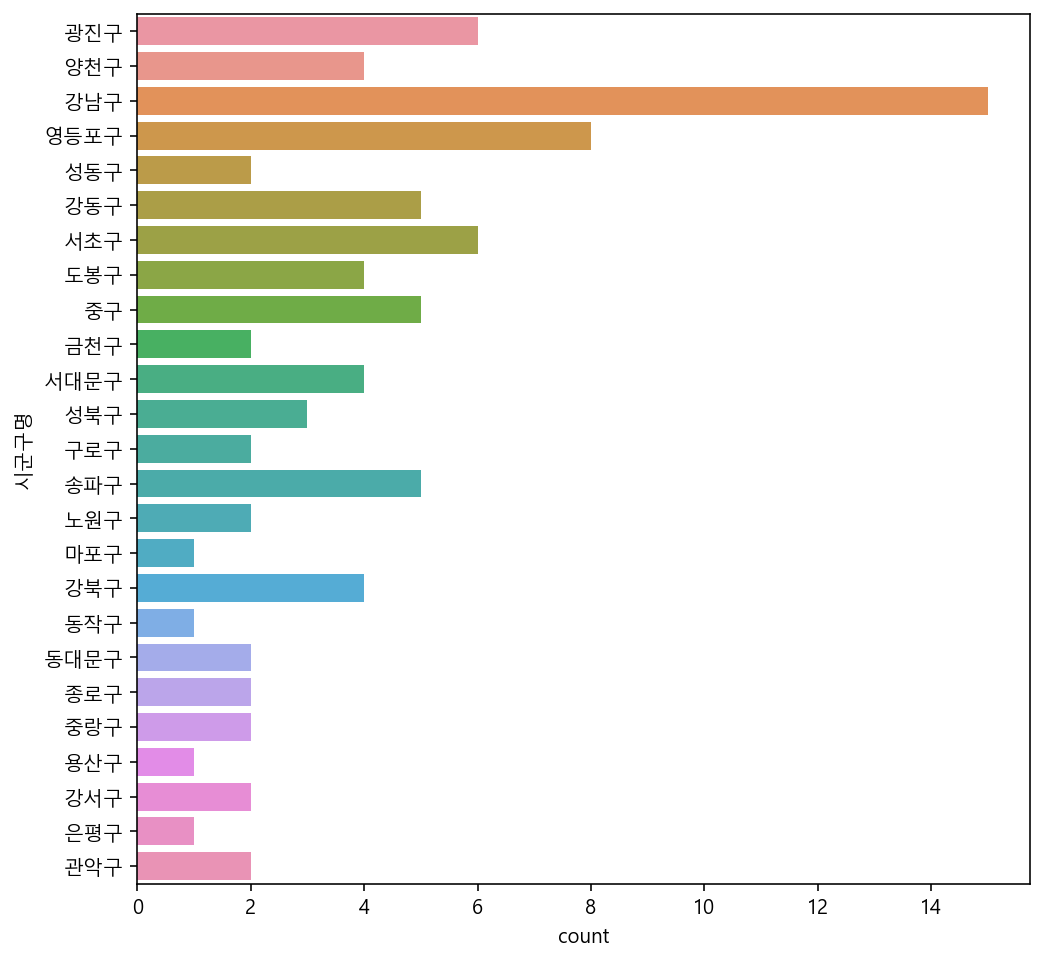

In [21]:
plt.figure(figsize = (8,8))
sns.countplot(data = df_seoul_hospital, y = '시군구명')
plt.show()

In [22]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명']

305                대진의료재단
353                홍익병원별관
385                  SNUH
1917     평화드림여의도성모병원의료기매장
2461                   한양
               ...       
71991        서울성모병원응급의료센터
76508               라마르의원
90492       가톨릭대학교여의도성모병원
90581                씨엠병원
90788              성베드로병원
Name: 상호명, Length: 91, dtype: object

In [23]:
# 상호명에서 특정 단어가 있는 것을 추출 - 꽃배달
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [24]:
# 장례식장, 의원, 꽃배달, 어린이집, 상담소가 들어가 있는 상호명을 제거
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('장례식장|의원|꽃배달|어린이집|상담소')].index
drop_row

Int64Index([ 2803,  4431,  4644,  7938,  8479, 10283, 12854, 13715, 14966,
            16091, 18047, 20200, 20415, 30706, 32889, 34459, 34720, 35696,
            37251, 45120, 47008, 49626, 51575, 55133, 56320, 56404, 56688,
            57551, 60645, 62113, 70177, 76508],
           dtype='int64')

In [25]:
drop_row = drop_row.tolist()
drop_row

[2803,
 4431,
 4644,
 7938,
 8479,
 10283,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 47008,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 60645,
 62113,
 70177,
 76508]

In [26]:
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0)

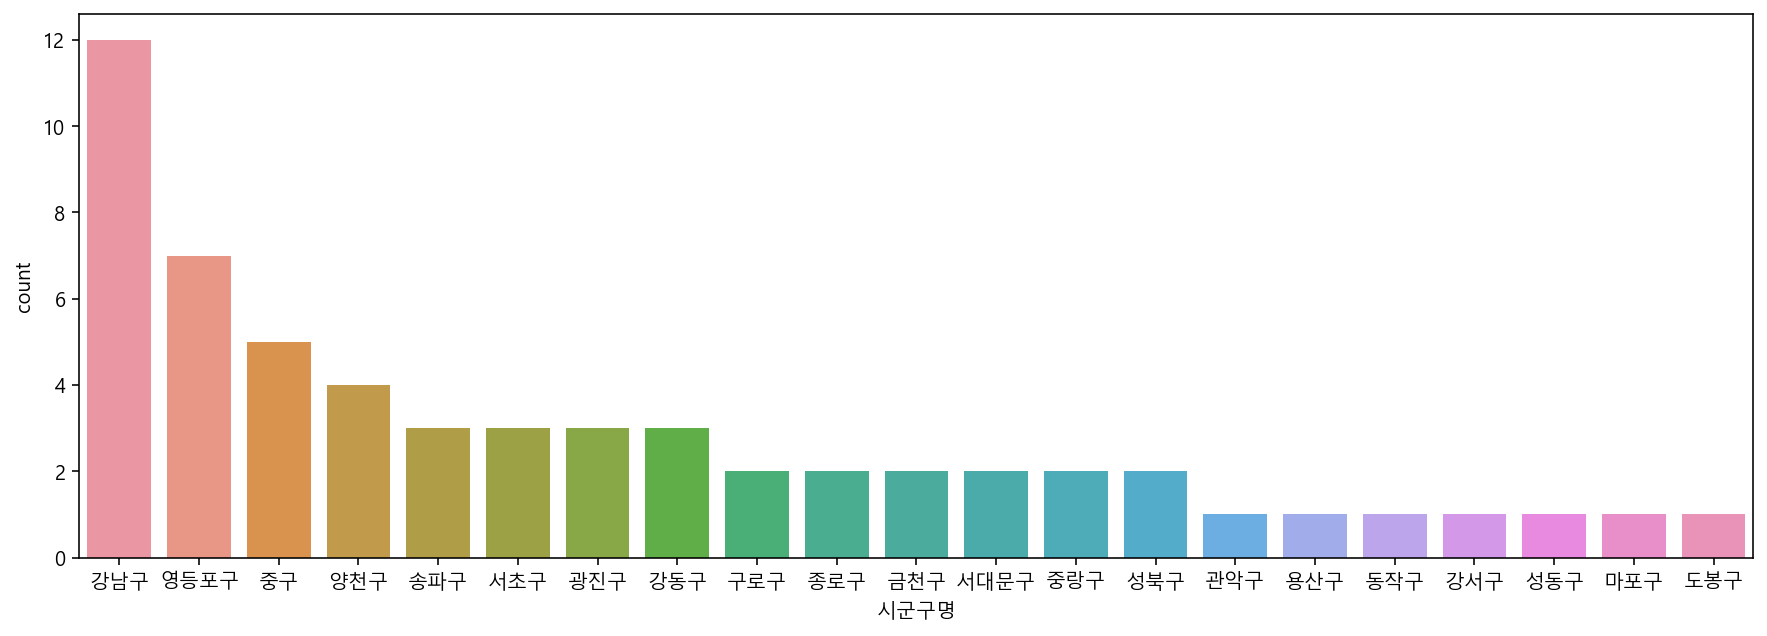

In [27]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_seoul_hospital, x = '시군구명', order = df_seoul_hospital['시군구명'].value_counts().index)
plt.show()

# 참고: 위경도 데이터 시각화

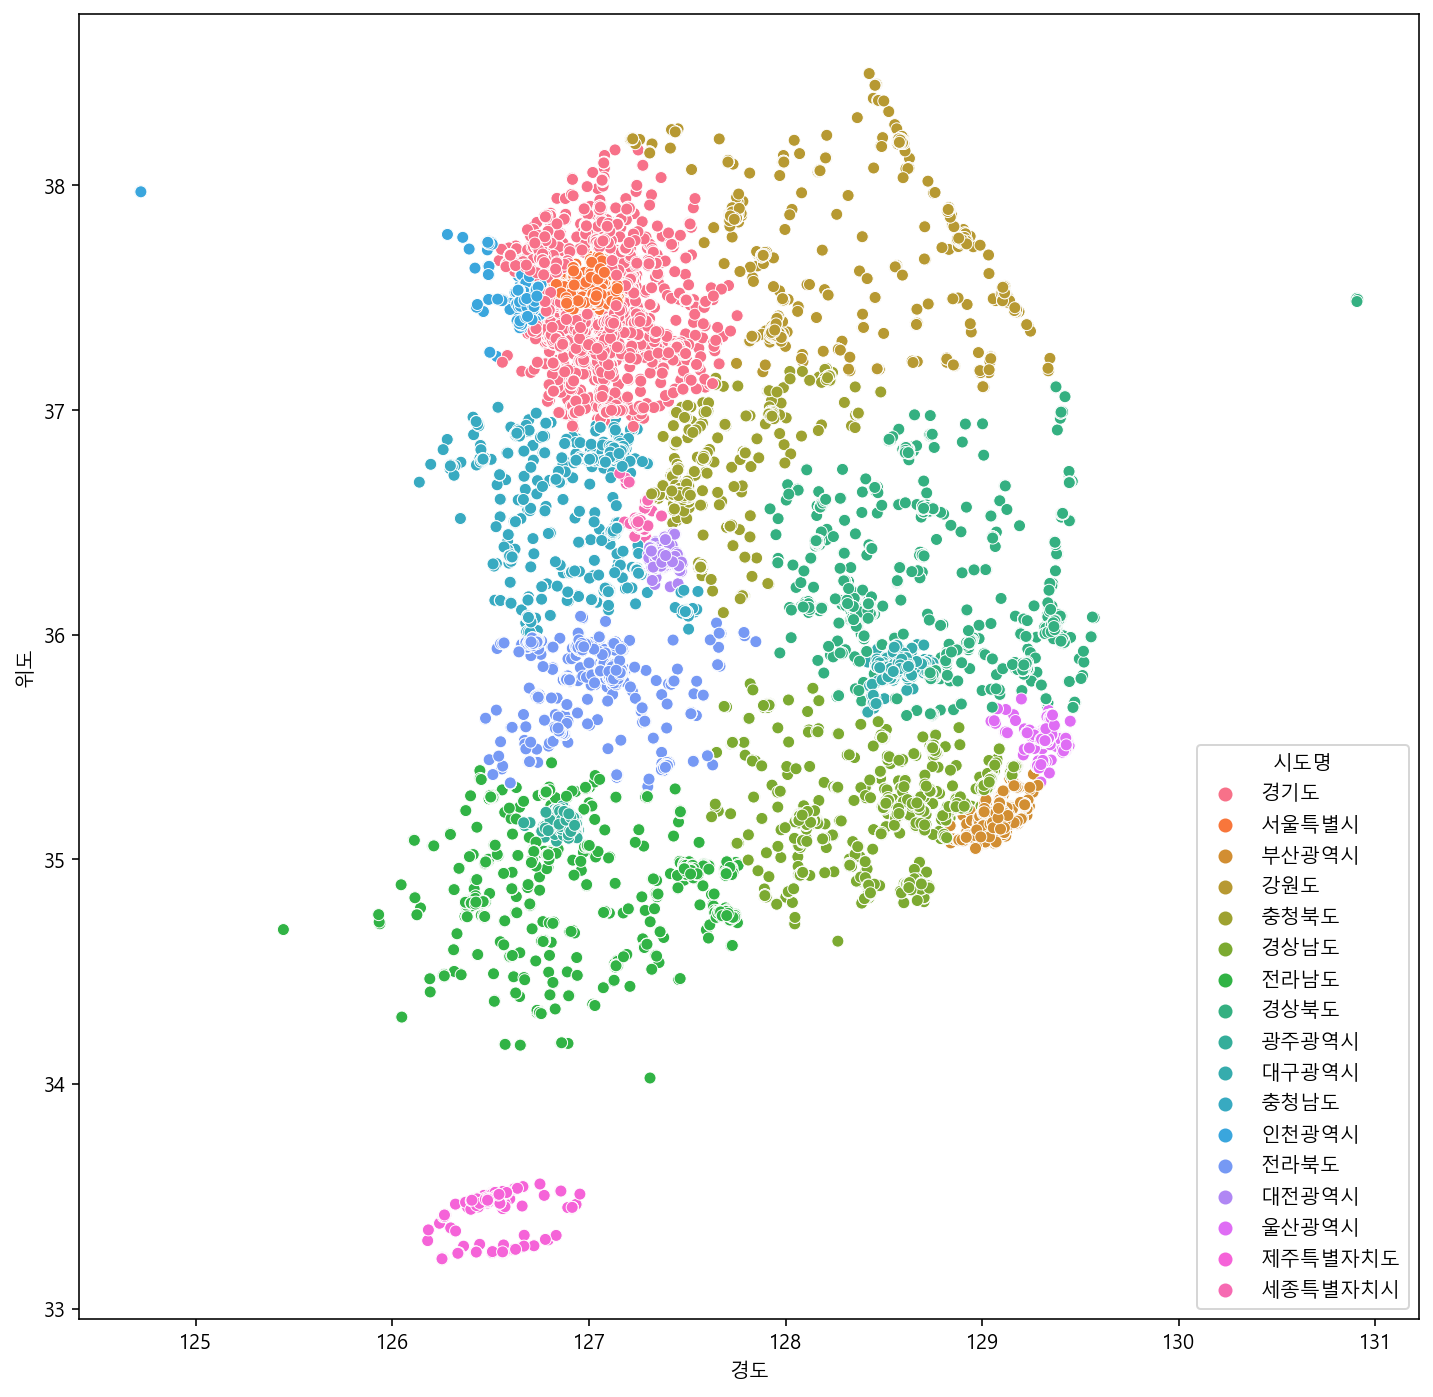

In [28]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df, x = '경도', y = '위도', hue = '시도명')
plt.show()

In [29]:
# 서울시 데이터 색인
df_seoul = df[df['시도명'] == '서울특별시']

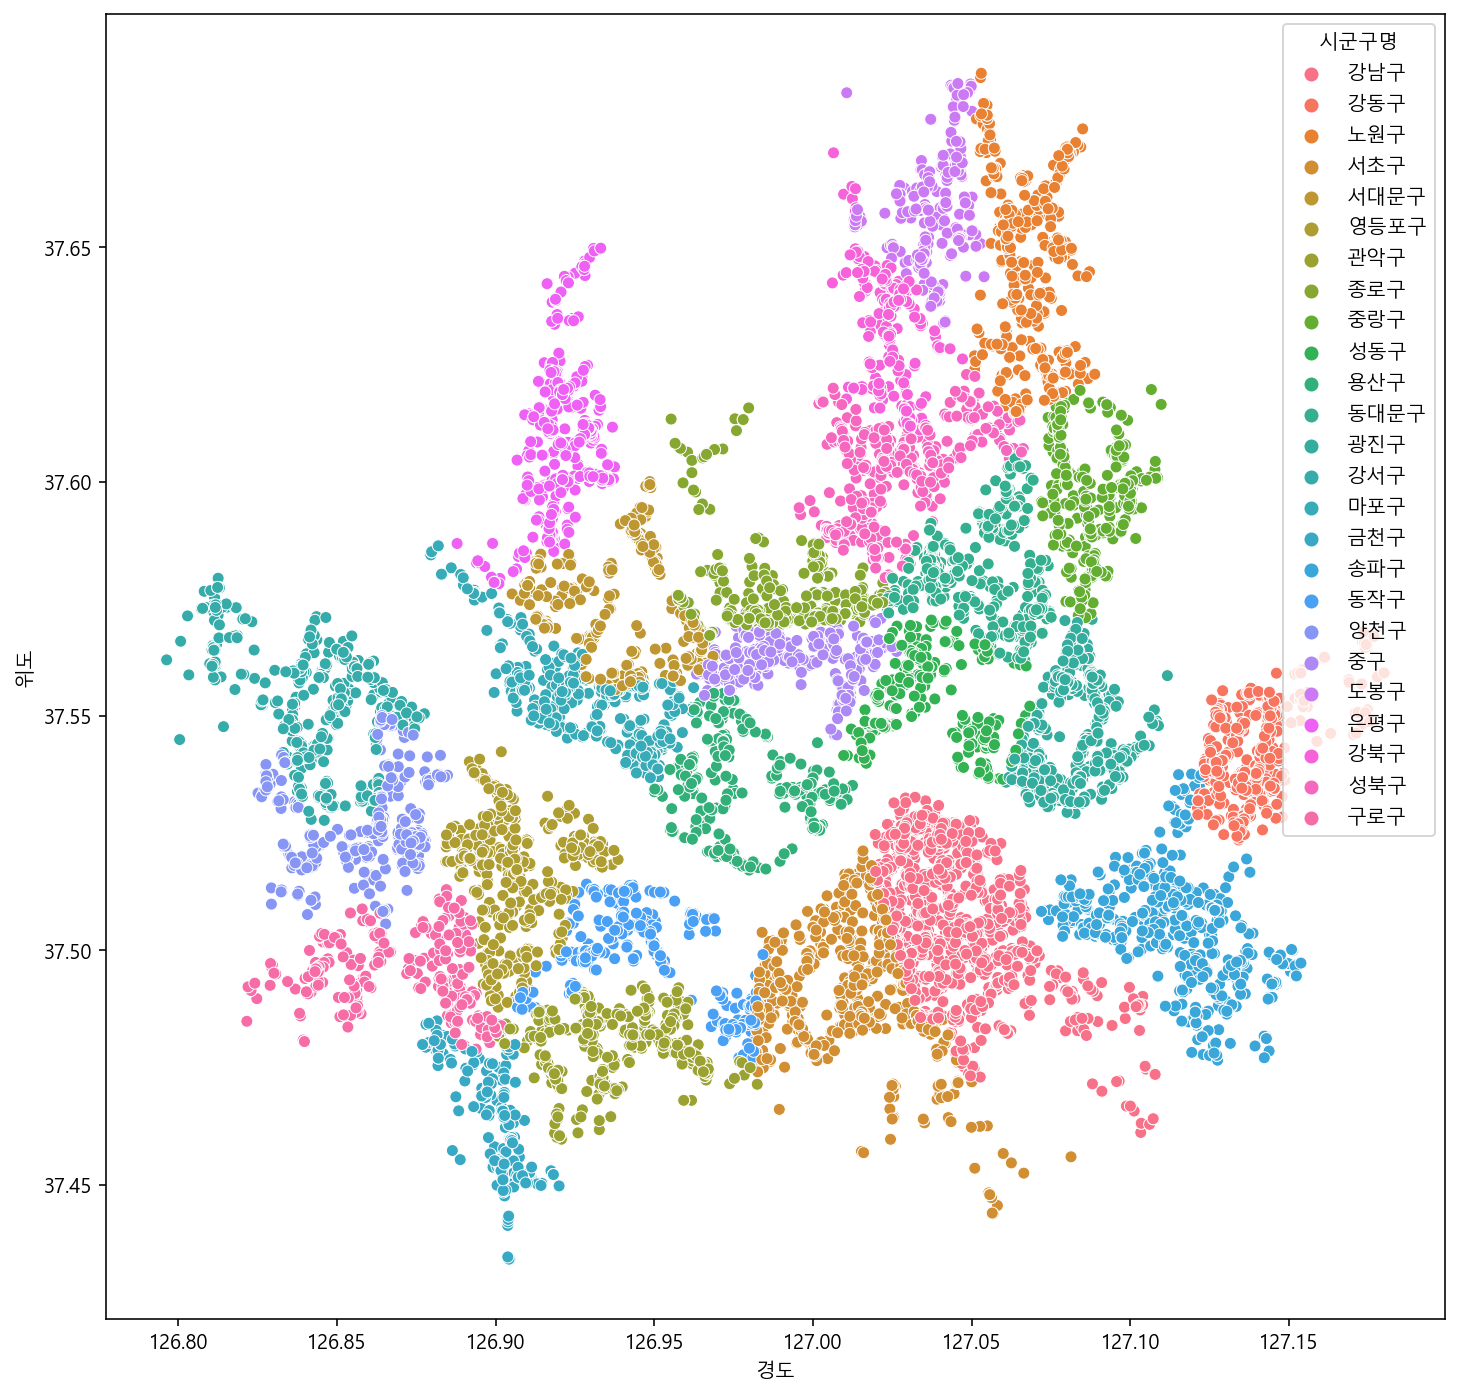

In [30]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도', hue = '시군구명')
plt.show()

# Folium 지도 라이브러리를 설치하고 활용

In [31]:
import folium
folium.Map()

In [32]:
# 지도의 중심좌표 설정
map = folium.Map(location = [df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()],zoom_start = 16)

for i in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[i, '상호명']
    address = df_seoul_hospital.loc[i, '도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[i, '위도'], df_seoul_hospital.loc[i, '경도']]
    folium.Marker(
    location = location,
        popup = popup
    ).add_to(map)

In [33]:
map